# Imports

In [119]:
## Numerical Calculations
import numpy as np

## Data
import pandas as pd
import collections
import json

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Text Processing
import re
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()

## Spacy
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)

# ## Language Detection
# import langdetect 

# ## Sentiment
# from textblob import TextBlob

## NER
import spacy

## SKLEARN

### Vectorizing
from sklearn import feature_extraction, manifold

### TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

### Label
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Word Embedding
import gensim.downloader as gensim_api

## Topic Modeling
import gensim

## Python Libraries
import math

## HTML Parsing
import bs4
from bs4 import BeautifulSoup, UnicodeDammit

## LXML parsing
from lxml import html

# Dataset

## Training Data

In [28]:
init_training_data = pd.read_csv('data/training/data_train.csv', sep=',', names=['country', 'sku_id', 'title', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'short_description', 'price', 'product_type'])
clarity_training_data = pd.read_csv('data/training/clarity_train.csv', sep=',', names=['clarity',''], usecols=['clarity'])
conciseness_training_data = pd.read_csv('data/training/conciseness_train.csv', sep=',', names=['conciseness',''], usecols=['conciseness'])

# Separately storing the data
training_data = init_training_data.copy()
training_data['clarity'] = clarity_training_data['clarity']
training_data['conciseness'] = conciseness_training_data['conciseness']

## Validation Data

In [29]:
validation_data = pd.read_csv('data/validation/data_valid.csv', sep=',', names = ['country', 'sku_id', 'title', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'short_description', 'price', 'product_type'])
clarity_validation_data = pd.read_csv('data/validation/clarity_valid.csv', sep=',', names=['clarity',''], usecols=['clarity'])
conciseness_validation_data = pd.read_csv('data/validation/conciseness_valid.csv', sep=',', names=['conciseness',''], usecols=['conciseness'])

## Testing Data

In [30]:
testing_data = pd.read_csv('data/testing/data_test.csv', sep=',', names = ['country', 'sku_id', 'title', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'short_description', 'price', 'product_type'])
clarity_testing_data = pd.read_csv('data/testing/clarity_test.csv', sep=',', names=['clarity',''], usecols=['clarity'])
conciseness_testing_data = pd.read_csv('data/testing/conciseness_test.csv', sep=',', names=['conciseness',''], usecols=['conciseness'])

There are a lot of fields which depend on the string values. These all have to be preprocessed accordingly and made into newer features before we move on to exploring what these features contain. Accordingly, finding the correlation of these features also does not give anything of value.

In [31]:
training_data.corr()

,price,clarity,conciseness
price,1.000000,0.003322,0.009616
clarity,0.003322,1.000000,0.361611
conciseness,0.009616,0.361611,1.000000


# Preprocessing

## Missing Values - Imputation

### Column - Category_Lvl_3

In [32]:
def printColumnWithNA(data):
    for column in data.columns:
        print(column, data[column].isnull().sum())

In [33]:
def printColumnWithUnique(data):
    for column in data.columns:
        print(column, len(data[column].unique()))

In [34]:
printColumnWithNA(training_data)

country 0
sku_id 0
title 0
category_lvl_1 0
category_lvl_2 0
category_lvl_3 2135
short_description 33
price 0
product_type 277
clarity 0
conciseness 0


In [35]:
for idx in range(0 , len(training_data)):
    training_data.loc[idx, 'category_lvl_3'] = training_data.loc[idx]['category_lvl_1'] + " " + training_data.loc[idx]['category_lvl_2']

In [36]:
training_data[4:30]

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity,conciseness
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Health & Beauty Men's Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1
5,my,AS575ELCMZ4WANMY,Asus TP300LJ-DW004H Transformer Book Flip 4GB ...,Computers & Laptops,Laptops,Computers & Laptops Laptops,"<div class=""prod_content""> <div class=""prod_de...",2599.00,local,1,1
6,my,AS727ELAA9LLV1ANMY,NG-40C Ring-Shaped 40W 3166lm 5400K Macro Phot...,Cameras,Camera Accessories,Cameras Camera Accessories,<ul> <li>1. Color Temperature: 5400K</li> <li>...,388.99,international,1,1
7,my,BU512HBAA4WUVTANMY,Buytra Exfoliating Peel Foot Mask 1Pair,Health & Beauty,Bath & Body,Health & Beauty Bath & Body,<ul> <li>Reviving like a new born baby.</li> <...,10.40,international,1,1
8,my,CL787ELAW29LANMY,CLiPtec OCC121 Slim Flat USB 3.0 Extension Cab...,Computers & Laptops,Laptops,Computers & Laptops Laptops,"<ul style= ""padding: 0px; margin: 20px 0px 0px...",29.00,local,1,1
9,my,CO633HLAABREKOANMY,McDonald's Coke Can Glass Limited Edition 12oz...,Home & Living,Kitchen & Dining,Home & Living Kitchen & Dining,<ul> <li>Genuine issued McDonald's Coca Cola m...,25.00,local,1,1
10,my,EL802HLAA51ZZVANMY,ELENXS Stainless Steel Tea Ball Strainer Mesh ...,Home & Living,Kitchen & Dining,Home & Living Kitchen & Dining,<ul> <li>Stainless Steel Filter</li> <li>Stain...,9.48,international,1,1
11,my,EM688OTAA9H8S8ANMY,7mm Natural Prehnite Crystal Bracelet(Green),Watches Sunglasses Jewellery,Jewellery,Watches Sunglasses Jewellery Jewellery,<ul> <li>Material: Genuine Prehnite Crystal Be...,78.00,local,1,1
12,my,FE090OTAAAPW6VANMY,Feelontop Punk Rock Rhinestone Star Shape Long...,Watches Sunglasses Jewellery,Jewellery,Watches Sunglasses Jewellery Jewellery,<ul> <li>Lead and Nickle Free</li> <li>Good Qu...,15.55,international,1,1
13,my,FI087ELAA7Z6D7ANMY,"Fitbit Charge Wireless Activity Wristband, Blu...","TV, Audio / Video, Gaming & Wearables",Wearable Technology,"TV, Audio / Video, Gaming & Wearables Wearable...",<ul> <li>Accurately track all-day stats like s...,499.00,international,1,1


In [37]:
printColumnWithNA(training_data)

country 0
sku_id 0
title 0
category_lvl_1 0
category_lvl_2 0
category_lvl_3 0
short_description 33
price 0
product_type 277
clarity 0
conciseness 0


### Column - Short Description

In [38]:
training_data[training_data['short_description'].isna()][:5]

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity,conciseness
924,my,BG674ELALY2IANMY,EGO-LT-6 Aluminum Alloy Electronic Cigarette w...,"TV, Audio / Video, Gaming & Wearables",Gadgets,"TV, Audio / Video, Gaming & Wearables Gadgets",NaN,94.0,international,1,1
1381,ph,AS595ELAA1FGGPANPH,"$Asus Fonepad 7"" Android 4.1 WiFi/3G ME371MG-7...",Mobiles & Tablets,Tablets,Mobiles & Tablets Tablets,NaN,25700.0,NaN,1,1
2797,ph,BE718HLAX94DANPH,"Klestar Pinoy Fan 10"" stand fan KSF-10 (blue)#",Home Appliances,Cooling & Heating,Home Appliances Cooling & Heating,NaN,1400.0,NaN,1,1
4463,ph,OR212HBABMTYANPH,Ogx Renewing Moroccan Argan Oil 3-piece Starte...,Health & Beauty,Hair Care,Health & Beauty Hair Care,NaN,699.0,NaN,1,1
5349,ph,OL364HBAA3LYPLANPH,Olay Regenerist Micro-Sculpting Cream Moisturi...,Health & Beauty,Skin Care,Health & Beauty Skin Care,NaN,999.0,NaN,1,1


In [39]:
# How to check for NaN
np.isnan(training_data.loc[924, 'short_description'])

True

### HTML Preprocessing, for column 'Short Description'

In [40]:
training_data['new_description'] = training_data['short_description']

for idx in range(0, len(training_data)):
    entry = training_data.loc[idx, 'short_description']

    # Avoiding NaN values
    if not type(entry) is float:

        # If it's a simple string without HTML parsing required 
        if '<ul' not in entry and '<li' not in entry and '<div' not in entry:

            training_data.loc[idx, 'new_description'] = entry
        
        # Else if the <div> tag exists in the description
        elif '<div' in entry:
            # Extract from div
            soup = BeautifulSoup(entry)

            # Find all div
            soup_div = soup.find_all('div')

            # Extracing the inner most div
            children = soup_div[len(soup_div) - 1].findChildren('li')

            # Making a new string for the new description
            finalNewDescription = ''

            # Traversing through each children
            for child in children:
                
                if len(child.contents) > 1 or r'</(.*)' in str(child.contents[0]) or isinstance(child.contents[0], (bs4.element.Tag)):
                    continue

                # Extracting a stripped version of the contents.
                # The [0] exists because contents create a list
                # of len 1
                __temp_str = child.contents[0].strip()

                # This acts as a replacement method for weird strings and other
                # oddities for cleaning them up, and replacing with what seems more
                # appropriate
                for (substr, replacement) in zip(['< li>', '< ul>', '< div>', '( ', ' -', '  ', ' li>', '- '], ['', '', '', '(', '-', ' ', '', '-']):

                    # Keep replacing as a loop
                    __temp_str = __temp_str.replace(substr, replacement)
                
                # Concatenate the new resultant clean string
                finalNewDescription += f'{__temp_str} '

            # Set the new row of 'new_description' to this finalNewDescription string
            training_data.loc[idx, 'new_description'] = finalNewDescription

        # Else if either the <ul> or the <li> tag exists in the code
        elif '<ul' in entry or '<li' in entry:

            # Get an object for the BeautifulSoup parsing tree
            soup = BeautifulSoup(entry)
            
            # Find all existences of <li> tags
            soup_li = soup.find_all('li')

            # Let the new string for the new description be
            # called 'finalNewDescription'
            finalNewDescription = ''

            # Going through all the <li> tags
            for soup_len in range(0, len(soup_li)):
                
                # Appending to the finalNewDescription
                finalNewDescription += "\n" + soup_li[soup_len].get_text()

            # Setting to our dataframe
            training_data.loc[idx, 'new_description'] = finalNewDescription
        
        elif '<p' in entry:

            # Get an object for the BeautifulSoup parsing tree
            soup = BeautifulSoup(entry)

            # Find all existences of <li> tags
            soup_p = soup.find_all('p')

            # Let the new string for the new description be
            # called 'finalNewDescription'
            finalNewDescription = ''

            # Going through all the <li> tags
            for soup_len in range(0, len(soup_u)):

                # Appending to the finalNewDescription
                finalNewDescription += '\n' + soup_p[soup_len].contents[0]

            # Setting to our dataframe
            training_data.loc[idx, 'new_description'] = finalNewDescription            

        # Creating a temporary string
        __temp_str = training_data.loc[idx, 'new_description']

        # Replacing strings with more than 
        for (substr, replacement) in zip([', ', 'x ' '\n', '：', ':', '\xa0', '/ ', '.', ',', ';', ' ', '  ', '   ', ' -', '\n', ' x ', '  '], [' ', 'x', ' ', '', '', ' ', '/', ' ', '', ' ', ' ', ' ', '-', ' ', 'x', ' ']):
            # Keep replacing as a loop
            __temp_str = __temp_str.replace(substr, replacement)

        # TODO: Go through texts that require replacements with regex
        # __temp_str = re.sub(r'[0-9]+ 0+', r'[0-9]+.0+', __temp_str)

        training_data.loc[idx, 'new_description'] = __temp_str.strip().lower()

In [41]:
# 115, 128,
print(f'\'{training_data.iloc[180]["new_description"]}\'')
print(training_data.iloc[180]['short_description'])

'compatible with apple iphone 7 plus 5/5 inch/ not for iphone 7 4/7 inch flexible rugged tpu case with lattice treatment for tight grid prevent phone from drops hybrid case-[impact resistant/scratch-proof] rubber case + shockproof hard pc cover precise cutouts complete access to all ports buttons and features easy to press for a seamless experience with the responsive button premium protection dual layer protection/made of soft tpu and hard pc back can protect your iphone from dropping shocking and scratching etc/'
<ul class="a-vertical a-spacing-none" style= "box-sizing:border-box;margin-top:0px;margin-right:0px;margin-left:18px;color:#949494;padding:0px;font-family:Arial, sans-serif;font-size:13px;line-height:19px;white-space:normal;margin-bottom:0px !important;background-color:#FFFFFF;"> <li style= "box-sizing:border-box;list-style:disc;word-wrap:break-word;margin:0px;"> Compatible with : Apple iPhone 7 Plus 5.5 inch. NOT for iPhone 7 4.7 inch</li> <li style= "box-sizing:border-box;

In [42]:
printColumnWithNA(training_data)

country 0
sku_id 0
title 0
category_lvl_1 0
category_lvl_2 0
category_lvl_3 0
short_description 33
price 0
product_type 277
clarity 0
conciseness 0
new_description 33


In [43]:
for idx in range(0, len(training_data)):

    entry = training_data.loc[idx, 'short_description']

    if type(entry) is float:
        training_data.loc[idx, 'new_description'] = training_data.loc[idx, 'category_lvl_3']

In [44]:
printColumnWithNA(training_data)

country 0
sku_id 0
title 0
category_lvl_1 0
category_lvl_2 0
category_lvl_3 0
short_description 33
price 0
product_type 277
clarity 0
conciseness 0
new_description 0


In [45]:
del training_data['short_description']

### Column - Product Type

In [46]:
international_perc = list(training_data['product_type'].value_counts())[0] / len(training_data)
local_perc = list(training_data['product_type'].value_counts())[1] / len(training_data)

international_count = 0
local_count = 0

international_floor_count = math.floor(international_perc * 277)
local_floor_count = math.floor(local_perc * 277)

for idx in range(0, len(training_data)):

    entry = training_data.loc[idx, 'product_type']

    if type(entry) is float:

        if international_count < international_floor_count:

            training_data.loc[idx, 'product_type'] = 'international'
            international_count += 1

        elif local_count < local_floor_count:

            training_data.loc[idx, 'product_type'] = 'local'
            local_count +=1

In [47]:
printColumnWithNA(training_data)

country 0
sku_id 0
title 0
category_lvl_1 0
category_lvl_2 0
category_lvl_3 0
price 0
product_type 3
clarity 0
conciseness 0
new_description 0


### Final Preprocessing Results

In [48]:
training_data.columns

Index(['country', 'sku_id', 'title', 'category_lvl_1', 'category_lvl_2',
       'category_lvl_3', 'price', 'product_type', 'clarity', 'conciseness',
       'new_description'],
      dtype='object')

In [49]:
column_names = ['sku_id', 'country', 'title', 'new_description', 'price', 'product_type', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'clarity', 'conciseness']

training_data = training_data.reindex(columns=column_names)

In [50]:
training_data.head()

,sku_id,country,title,new_description,price,product_type,category_lvl_1,category_lvl_2,category_lvl_3,clarity,conciseness
0,AD674FAASTLXANMY,my,Adana Gallery Suri Square Hijab – Light Pink,material non sheer shimmer chiffon sizes 52x52...,49.00,local,Fashion,Women,Fashion Women,1,1
1,AE068HBAA3RPRDANMY,my,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,formulated with oil-free hydrating botanicals ...,128.00,international,Health & Beauty,Bath & Body,Health & Beauty Bath & Body,1,1
2,AN680ELAA9VN57ANMY,my,Andoer 150cm Cellphone Smartphone Mini Dual-He...,150cm mini microphone compatible for iphone va...,25.07,international,"TV, Audio / Video, Gaming & Wearables",Audio,"TV, Audio / Video, Gaming & Wearables Audio",1,0
3,AN957HBAAAHDF4ANMY,my,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,anmyna complaint silky set (shampoo 520ml + co...,118.00,local,Health & Beauty,Hair Care,Health & Beauty Hair Care,1,1
4,AR511HBAXNWAANMY,my,Argital Argiltubo Green Clay For Face and Body...,100% authentic rrefresh and brighten skin anti...,114.80,international,Health & Beauty,Men's Care,Health & Beauty Men's Care,1,1


In [51]:
printColumnWithNA(training_data)

sku_id 0
country 0
title 0
new_description 0
price 0
product_type 3
category_lvl_1 0
category_lvl_2 0
category_lvl_3 0
clarity 0
conciseness 0


## Stemming

### For column 'title'

In [52]:
test_training_data = training_data.copy()


for idx in range(0, len(training_data)):

    entry = test_training_data.loc[idx, 'title']
    newEntry = ''

    for token in tokenizer(entry):
        if not token.is_digit:
            newEntry += porter.stem(str(token)) + ' '
        else:
            newEntry += str(token) + ' '

    test_training_data.loc[idx, 'title'] = newEntry.lower()

In [53]:
test_training_data

,sku_id,country,title,new_description,price,product_type,category_lvl_1,category_lvl_2,category_lvl_3,clarity,conciseness
0,AD674FAASTLXANMY,my,adana galleri suri squar hijab – light pink,material non sheer shimmer chiffon sizes 52x52...,49.00,local,Fashion,Women,Fashion Women,1,1
1,AE068HBAA3RPRDANMY,my,cuba heartbreak eau de parfum spray 100ml/3.3oz,formulated with oil-free hydrating botanicals ...,128.00,international,Health & Beauty,Bath & Body,Health & Beauty Bath & Body,1,1
2,AN680ELAA9VN57ANMY,my,andoer 150cm cellphon smartphon mini dual-head...,150cm mini microphone compatible for iphone va...,25.07,international,"TV, Audio / Video, Gaming & Wearables",Audio,"TV, Audio / Video, Gaming & Wearables Audio",1,0
3,AN957HBAAAHDF4ANMY,my,anmyna complaint silki set 柔顺洗发配套 (shampoo 520...,anmyna complaint silky set (shampoo 520ml + co...,118.00,local,Health & Beauty,Hair Care,Health & Beauty Hair Care,1,1
4,AR511HBAXNWAANMY,my,argit argiltubo green clay for face and bodi 2...,100% authentic rrefresh and brighten skin anti...,114.80,international,Health & Beauty,Men's Care,Health & Beauty Men's Care,1,1
...,...,...,...,...,...,...,...,...,...,...,...
36278,SA584ELAA4G4W0SGAMZ,sg,sade k10 led backlit wire usb mechan game keyb...,no driver needed/blue switches is the core of ...,67.09,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,1,1
36279,SO499HAAA4CCLASGAMZ,sg,sona 20l electr oven seo 2220,2 years warranty thermal fuse safety protectio...,69.00,local,Home Appliances,Large Appliances,Home Appliances Large Appliances,1,1
36280,TI990ELAA5ZV1JSGAMZ,sg,op1001 portabl wireless bluetooth 2.1 speaker ...,with colorful lights on the button light up yo...,35.00,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,1,0
36281,WO203HLAA3KFPCSGAMZ,sg,woot-woot tictacto pillow case (white),100% cotton safe for sensitive skin cool and c...,23.00,local,Home & Living,Bedding,Home & Living Bedding,1,1


In [54]:
training_data = test_training_data.copy()

### For column 'new_description'

In [55]:
test_training_data = training_data.copy()


for idx in range(0, len(training_data)):

    entry = test_training_data.loc[idx, 'new_description']
    newEntry = ''

    for token in tokenizer(entry):
        if not token.is_digit:
            newEntry += porter.stem(str(token)) + ' '
        else:
            newEntry += str(token) + ' '

    test_training_data.loc[idx, 'new_description'] = newEntry.lower()

In [56]:
test_training_data

,sku_id,country,title,new_description,price,product_type,category_lvl_1,category_lvl_2,category_lvl_3,clarity,conciseness
0,AD674FAASTLXANMY,my,adana galleri suri squar hijab – light pink,materi non sheer shimmer chiffon size 52x52 in...,49.00,local,Fashion,Women,Fashion Women,1,1
1,AE068HBAA3RPRDANMY,my,cuba heartbreak eau de parfum spray 100ml/3.3oz,formul with oil-fre hydrat botan remark improv...,128.00,international,Health & Beauty,Bath & Body,Health & Beauty Bath & Body,1,1
2,AN680ELAA9VN57ANMY,my,andoer 150cm cellphon smartphon mini dual-head...,150cm mini microphon compat for iphon variou s...,25.07,international,"TV, Audio / Video, Gaming & Wearables",Audio,"TV, Audio / Video, Gaming & Wearables Audio",1,0
3,AN957HBAAAHDF4ANMY,my,anmyna complaint silki set 柔顺洗发配套 (shampoo 520...,anmyna complaint silki set (shampoo 520ml + co...,118.00,local,Health & Beauty,Hair Care,Health & Beauty Hair Care,1,1
4,AR511HBAXNWAANMY,my,argit argiltubo green clay for face and bodi 2...,100% authent rrefresh and brighten skin anti-w...,114.80,international,Health & Beauty,Men's Care,Health & Beauty Men's Care,1,1
...,...,...,...,...,...,...,...,...,...,...,...
36278,SA584ELAA4G4W0SGAMZ,sg,sade k10 led backlit wire usb mechan game keyb...,no driver needed/blu switch is the core of the...,67.09,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,1,1
36279,SO499HAAA4CCLASGAMZ,sg,sona 20l electr oven seo 2220,2 year warranti thermal fuse safeti protect 6 ...,69.00,local,Home Appliances,Large Appliances,Home Appliances Large Appliances,1,1
36280,TI990ELAA5ZV1JSGAMZ,sg,op1001 portabl wireless bluetooth 2.1 speaker ...,with color light on the button light up your m...,35.00,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,1,0
36281,WO203HLAA3KFPCSGAMZ,sg,woot-woot tictacto pillow case (white),100% cotton safe for sensit skin cool and comf...,23.00,local,Home & Living,Bedding,Home & Living Bedding,1,1


In [57]:
training_data = test_training_data.copy()

## Stop Words Removal

This aspect is actually very confusing. We expect descriptions to describe relations with what it is actually saying. Simply having buzz words in a description does not say anything about clarity, in fact, it should intuitively harm it. What does the product do? With what relations? Whom does it concern? Pausing work on stop words at the moment.

## Feature representation

In a bag-of-word representation, how to give each word a feature value is anissue.  The simplest method is a binary representation so that each featureis 0 or 1 to indicate the appearance of a word.  This setting can be easily extended to term frequency (TF), which indicates the number of occurrences of a word in a text.  Some more sophisticated feature representations havebeen proposed.  TF-IDF is a popular one defined as 

$$xi,j= TFi,j×IDFj - (1)$$

where $x_{ij}$ is thejth feature of the *i*th feature vector $x_i$, $TF_{i,j}$ is the term frequency, and $IDF_{j}$ is the inverse document frequency,

$$IDF_{j}=log\frac{TrainingInstances}{TrainingInstancesWithWord_{j}}$$

Because popular words may appear in the same document several times and cause large TF values, IDF is used to avoid their dominance. A common step after generating feature  vectors is to normalize each instance to a unit vector. That is,

$$xi← \frac{xi}{‖xi‖}$$

### TF, IDF for column 'title'

The below code is extremely inefficent. It's also much better to not reinvent the wheel and use `sklearn.feature_extraction.text.TfidfVectorizer`.

```python

import pandas as pd
import numpy as np

unique_words = []
training_data.apply(lambda row: [unique_words.append(token) for token in row['title'].split(' ') if token not in unique_words], axis=1)

tf_matrix = np.zeros((len(unique_words), len(training_data['title'])))
print(tf_matrix.shape)

columnSize = 363283
rowSize = 42445

tf_matrix = pd.DataFrame(data=np.array([[0] * columnSize]), columns=[val for val in range(0, columns)])

for i in range(0, rows):
    tf_matrix.append(pd.Series([[0] * columnSize]), ignore_index=True)

print(tf_matrix)
```

In [105]:
# Extracing the title corpus from the dataFrame
corpus = training_data.apply(lambda row: row['title'], axis=1)

# Converting pd.Series to a list
corpus = list(corpus)

### TF IDF Vectorizer

In [106]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

 'veil', 'vein', 'veithdia', 'velcro', 'velec', 'velishi', 'veloc', 'velvet', 'velveteen', 'velveti', 'velvetin', 'vendoor', 'veneer', 'venesa', 'venetian', 'vengeanc', 'vengeance', 'venic', 'venicen', 'venom', 'vent', 'venta', 'venter', 'ventil', 'vention', 'venu', 'veowalk', 'ver', 'vera', 'verbena', 'verdon', 'verg', 'vergeturyl', 'veri', 'verisimilitud', 'veriton', 'verizon', 'verne', 'vernier', 'verona', 'veronica', 'vers', 'versa', 'versac', 'versatil', 'versavu', 'version', 'version3', 'versu', 'vert', 'vertebra', 'vertex', 'vertic', 'vertical', 'vertigo', 'vertigrow', 'veru', 'verve', 'verygood', 'vespa', 'vessel', 'vest', 'vesta', 'vestibul', 'vestido', 'vestidos', 'vestiti', 'vetiv', 'vf4110', 'vg', 'vga', 'vga11', 'vgg08', 'vgn', 'vgp', 'vh', 'vhb', 'vhdci', 'vhf', 'vi', 'vi10', 'vi8', 'via', 'vial', 'viartril', 'vibe', 'vibrant', 'vibrat', 'vibrissa', 'vibroact', 'viburnum', 'vicar', 'vice', 'vichi', 'vici', 'victori', 'victoria', 'victorian', 'victorinox', 'vidalsassoon', 

In [107]:
print(len(vectorizer.get_feature_names()))
print(X.shape)

31329
(36283, 31329)


In [108]:
analyzer = vectorizer.build_analyzer()

In [109]:
print(analyzer)
print(type(analyzer))
print(analyzer(corpus[0]), analyzer(corpus[1]), analyzer(corpus[2]))

functools.partial(<function _analyze at 0x7f1cb9c0b820>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer()>, tokenizer=<built-in method findall of re.Pattern object at 0x7f1cad4e8b90>, preprocessor=functools.partial(<function _preprocess at 0x7f1cb9c0b700>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer()>, stop_words=None)
<class 'functools.partial'>
['adana', 'galleri', 'suri', 'squar', 'hijab', 'light', 'pink'] ['cuba', 'heartbreak', 'eau', 'de', 'parfum', 'spray', '100ml', '3oz'] ['andoer', '150cm', 'cellphon', 'smartphon', 'mini', 'dual', 'head', 'omni', 'direct', 'mic', 'microphon', 'with', 'collar', 'clip', 'for', 'ipad', 'iphone5', '6s', 'plu', 'smartphon']


In [110]:
preprocessor = vectorizer.build_preprocessor()

In [111]:
print(preprocessor)
print(type(preprocessor))
print(f'\'{preprocessor(corpus[0])}\', \'{preprocessor(corpus[1])}\', \'{preprocessor(corpus[2])}\'')

functools.partial(<function _preprocess at 0x7f1cb9c0b700>, accent_function=None, lower=True)
<class 'functools.partial'>
'adana galleri suri squar hijab – light pink ', 'cuba heartbreak eau de parfum spray 100ml/3.3oz ', 'andoer 150cm cellphon smartphon mini dual-head omni-direct mic microphon with collar clip for ipad iphone5 6s 6 plu smartphon '


In [112]:
tokenizer = vectorizer.build_tokenizer()

In [113]:
tokenizer

<function Pattern.findall(string, pos=0, endpos=9223372036854775807)>

### CountVectorizer

In order to start using TfidfTransformer you will first have to create a CountVectorizer to count the number of words (term frequency), limit your vocabulary size, apply stop words and etc. The code below does just that.

In [116]:
# Instantiate CountVectorizer()
cv = CountVectorizer()

# This step generates word counts for the words in your docs
word_count_vector = cv.fit_transform(corpus)

We should have the shape (36283, 31329), which means we have 36283 rows (36283 'docs'), and 31329 columns(31329 unique words, minus single character words)

In [122]:
word_count_vector.shape

(36283, 31329)

In [139]:
word_count_vector

<36283x31329 sparse matrix of type '<class 'numpy.int64'>'
	with 409311 stored elements in Compressed Sparse Row format>

Sweet, this is what we want! Now it’s time to compute the IDFs. Note that in this notebook, we are using all the defaults with CountVectorizer. You can actually specify a custom stop word list, enforce minimum word count, etc. See this article on [how to use CountVectorizer](https://kavita-ganesan.com/how-to-use-countvectorizer/).

Now we are going to compute the IDF values by calling ```tfidf_transformer.fit(word_count_vector)``` on the word counts we computed earlier.

In [141]:
# Extracing the transformer
tfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True)

# Fitting to the transformer
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

To get a glimpse of how the IDF values look, we are going to print it by placing the IDF values in a python DataFrame. The values will be sorted in ascending order.

In [121]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
for,2.293402
black,2.896863
intl,2.956466
case,3.045092
with,3.282234
...,...
frick,10.805985
18000,10.805985
freshmint,10.805985
frangranc,10.805985


Notice that the words '*herald*' and '*frangranc*' have the lowest IDF values. This is expected as these words appear in each and every document in our collection. The lower the IDF value of a word, the less unique it is to any particular document.

Once you have the IDF values, you can now compute the tf-idf scores for any document or set of documents. Let’s compute tf-idf scores for the 36283 documents in our collection.

In [142]:
# count matrix 
count_vector = cv.transform(corpus) 
 
# tf-idf scores 
tf_idf_vector = tfidf_transformer.transform(count_vector)

The first line above, gets the word counts for the documents in a sparse matrix form. We could have actually used word_count_vector from above. However, in practice, you may be computing tf-idf scores on a set of new unseen documents. When you do that, you will first have to do cv.transform(your_new_docs) to generate the matrix of word counts.

Then, by invoking tfidf_transformer.transform(count_vector) you will finally be computing the tf-idf scores for your docs. Internally this is computing the tf * idf  multiplication where your term frequency is weighted by its IDF values.


In [143]:
tf_idf_vector

<36283x31329 sparse matrix of type '<class 'numpy.float64'>'
	with 409311 stored elements in Compressed Sparse Row format>

Now, let’s print the tf-idf values of the first document to see if it makes sense. What we are doing below is, placing the tf-idf scores from the first document into a pandas data frame and sorting it in descending order of scores.

In [144]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector = tf_idf_vector[0] 
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index = feature_names, columns = ["tfidf"]) 
df.sort_values(by = ["tfidf"], ascending = False)

,tfidf
adana,0.494075
suri,0.494075
galleri,0.452180
hijab,0.375074
squar,0.284908
...,...
cr2450,0.000000
cr2032,0.000000
cr2025,0.000000
cr2016,0.000000


Notice that only certain words have scores. This is because our first document is “the house had a tiny little mouse”  all the words in this document have a tf-idf score and everything else show up as zeroes. Notice that the word “a” is missing from this list. This is possibly due to internal pre-processing of CountVectorizer where it removes single characters.

The scores above make sense. The more common the word across documents, the lower its score and the more unique a word is to our first document (e.g. ‘had’ and ‘tiny’) the higher the score. So it’s working as expected except for the mysterious a that was chopped off.

Now, we are going to use the same 36283 documents from above to do the same thing as we did for Tfidftransformer – which is to get the tf-idf scores of a set of documents. But, notice how this is much shorter.

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It’s really simple.

In [145]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(corpus)

Now let’s print the tfidf values for the first document from our collection. Notice that these values are identical to the ones from Tfidftransformer, only thing is that it’s done in just two steps.

In [174]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index = tfidf_vectorizer.get_feature_names(), columns = ["tfidf"])
df = df.sort_values(by = ["tfidf"],ascending = False)
df = df.reset_index()
df

,index,tfidf
0,adana,0.494075
1,suri,0.494075
2,galleri,0.452180
3,hijab,0.375074
4,squar,0.284908
...,...,...
31324,cr2450,0.000000
31325,cr2032,0.000000
31326,cr2025,0.000000
31327,cr2016,0.000000


Here’s another way to do it by calling fit and transform separately and you’ll end up with the same results.

In [175]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
fitted_vectorizer = tfidf_vectorizer.fit(corpus)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(corpus)

In [176]:
tfidf_vectorizer_vectors

<36283x31329 sparse matrix of type '<class 'numpy.float64'>'
	with 409311 stored elements in Compressed Sparse Row format>

First converting the ```df``` to a dictionary


In [230]:
df_dict = {}

# It's better to store items in a dict
# Else pandas will scan row wise every single time a boolean expression
# for retrieving a slice of the DF is sent
# So each time I want to go ahead to access a token
# It takes on average 0.05s
for i in range(0, len(df)):
    df_dict[df.loc[i, 'index']] = df.loc[i, 'tfidf']

In [231]:
# With a df, it takes...
for i in range(0, 20):
    start = time.process_time()
    df[df['index'] == 'adana']
    print(time.process_time() - start)

0.006095834999996441
0.005238699000074121
0.0051164179999432235
0.004500680000091961
0.005190459999994346
0.004506232999574422
0.004576442000143288
0.003223989000161964
0.0038107439995656023
0.0031954760002008697
0.003048350999961258
0.0031794480000826297
0.0032274479999614414
0.005365385000004608
0.003753484999833745
0.002964141000120435
0.0025006420000863727
0.0026692980000007083
0.0029419720003716066
0.005486139999902662


In [232]:
# And with a dict, it takes...
for i in range(0, 20):
    start = time.process_time()
    df_dict['adana']
    print(time.process_time() - start)

3.4949998735100962e-06
2.9409998205665033e-06
1.0600001587590668e-06
7.620001269970089e-07
8.100000741251279e-07
2.3359998522209935e-06
2.3780003175488673e-06
4.072000137966825e-06
8.619999789516442e-07
9.020000106829684e-07
7.789999472151976e-07
7.639996510988567e-07
7.280000318132807e-07
7.749999895168003e-07
7.160001587180886e-07
7.429998731822707e-07
7.220000952656846e-07
8.319998414663132e-07
7.610001375724096e-07
7.20000116416486e-07


In [233]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(5, df_dict.items())

n_items

[('adana', 0.4940750238335588),
 ('suri', 0.4940750238335588),
 ('galleri', 0.45218005855303883),
 ('hijab', 0.3750739358441241),
 ('squar', 0.2849084886435737)]

In [234]:
import time

def ConvertLineToScore(line):
    
    finalResult = 0.0

    line_split = line.split(' ')
    
    for token in line_split:

        if token in df_dict:
            
            finalResult += float(df_dict[token])

    return finalResult

In [235]:
training_data['title_tfidf_scores'] = training_data.apply(lambda row: ConvertLineToScore(row['title']), axis=1)

In [236]:
training_data.sort_values(by = ["title_tfidf_scores"], ascending = False)

,sku_id,country,title,new_description,price,product_type,category_lvl_1,category_lvl_2,category_lvl_3,clarity,conciseness,title_tfidf_scores
0,AD674FAASTLXANMY,my,adana galleri suri squar hijab – light pink,materi non sheer shimmer chiffon size 52x52 in...,49.00,local,Fashion,Women,Fashion Women,1,1,2.513704
34432,UN308HLAA50AL9ANPH,ph,100 led string light solar christma light 8 mo...,waterproof suitabl for indoor and outdoor use/...,902.70,local,Home & Living,Lighting,Home & Living Lighting,1,0,0.837171
10459,LE311HLAA9FQ2RANMY,my,leegoal solar deck light wall mount waterproof...,solar power solar panel can faster absorb sun ...,49.90,international,Home & Living,Lighting,Home & Living Lighting,1,0,0.837171
28708,OE702ELAA6FHBRSGAMZ,sg,mini portabl photographi studio light tent fol...,materi pp light room + eva backdrop light room...,12.00,international,Cameras,Camera Accessories,Cameras Camera Accessories,1,0,0.837171
31161,OE702HLAA59O6YSGAMZ,sg,"starri night light lamp,color led moon ski sta...",newest generation--- there are 4 pc led bead o...,18.77,international,Home & Living,Lighting,Home & Living Lighting,1,0,0.831977
...,...,...,...,...,...,...,...,...,...,...,...,...
12349,UN308HBAA4FG8GANPH,ph,calvin klein ck one eau de toilett for unisex ...,eau de toilett share fragranc for men and wome...,1099.00,local,Health & Beauty,Fragrances,Health & Beauty Fragrances,1,1,0.000000
12348,UN308FAAA4K950ANPH,ph,bob marley t-shirt (black),brand new never been worn merchandis 100% cott...,630.00,local,Fashion,Men,Fashion Men,1,1,0.000000
12347,UN308FAAA40DX5ANPH,ph,pair of men' fashion flat heel slip on drive c...,leather pu leather soft and suppl pu leather r...,2275.89,international,Fashion,Men,Fashion Men,1,0,0.000000
12346,UN308ELAA1G7A9ANPH,ph,silicon keyboard cover skin for appl macbook p...,100% brand new and high quality/ type keyboard...,289.00,local,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,1,1,0.000000


## Bigrams

Stackoverflow zindabad, [Forming Bigrams of words in list of sentences with Python](https://stackoverflow.com/questions/21844546/forming-bigrams-of-words-in-list-of-sentences-with-python)

In [ ]:
>>> text = ["this is a sentence", "so is this one"]
>>> bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
>>> print(bigrams)

## Label Encoding

In [237]:
le = LabelEncoder()

for column in ['sku_id', 'country', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'product_type']:
    le.fit(training_data[column])
    training_data[column + '_encoded'] = le.transform(training_data[column])


In [238]:
column_names = ['sku_id', 'country', 'title', 'new_description', 'price', 'product_type', 'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'sku_id_encoded', 'country_encoded', 'category_lvl_1_encoded', 'category_lvl_2_encoded', 'category_lvl_3_encoded', 'product_type_encoded', 'clarity', 'conciseness']

training_data = training_data.reindex(columns=column_names)

In [239]:
training_data

,sku_id,country,title,new_description,price,product_type,category_lvl_1,category_lvl_2,category_lvl_3,sku_id_encoded,country_encoded,category_lvl_1_encoded,category_lvl_2_encoded,category_lvl_3_encoded,product_type_encoded,clarity,conciseness
0,AD674FAASTLXANMY,my,adana galleri suri squar hijab – light pink,materi non sheer shimmer chiffon size 52x52 in...,49.00,local,Fashion,Women,Fashion Women,338,0,2,56,18,1,1,1
1,AE068HBAA3RPRDANMY,my,cuba heartbreak eau de parfum spray 100ml/3.3oz,formul with oil-fre hydrat botan remark improv...,128.00,international,Health & Beauty,Bath & Body,Health & Beauty Bath & Body,350,0,3,3,19,0,1,1
2,AN680ELAA9VN57ANMY,my,andoer 150cm cellphon smartphon mini dual-head...,150cm mini microphon compat for iphon variou s...,25.07,international,"TV, Audio / Video, Gaming & Wearables",Audio,"TV, Audio / Video, Gaming & Wearables Audio",661,0,7,1,47,0,1,0
3,AN957HBAAAHDF4ANMY,my,anmyna complaint silki set 柔顺洗发配套 (shampoo 520...,anmyna complaint silki set (shampoo 520ml + co...,118.00,local,Health & Beauty,Hair Care,Health & Beauty Hair Care,684,0,3,23,23,1,1,1
4,AR511HBAXNWAANMY,my,argit argiltubo green clay for face and bodi 2...,100% authent rrefresh and brighten skin anti-w...,114.80,international,Health & Beauty,Men's Care,Health & Beauty Men's Care,883,0,3,36,26,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36278,SA584ELAA4G4W0SGAMZ,sg,sade k10 led backlit wire usb mechan game keyb...,no driver needed/blu switch is the core of the...,67.09,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,30801,2,1,8,8,0,1,1
36279,SO499HAAA4CCLASGAMZ,sg,sona 20l electr oven seo 2220,2 year warranti thermal fuse safeti protect 6 ...,69.00,local,Home Appliances,Large Appliances,Home Appliances Large Appliances,31916,2,5,30,42,1,1,1
36280,TI990ELAA5ZV1JSGAMZ,sg,op1001 portabl wireless bluetooth 2.1 speaker ...,with color light on the button light up your m...,35.00,international,Computers & Laptops,Computer Accessories,Computers & Laptops Computer Accessories,32710,2,1,8,8,0,1,0
36281,WO203HLAA3KFPCSGAMZ,sg,woot-woot tictacto pillow case (white),100% cotton safe for sensit skin cool and comf...,23.00,local,Home & Living,Bedding,Home & Living Bedding,35365,2,4,5,30,1,1,1


# Data Exploration 

In [240]:
printColumnWithUnique(training_data)

sku_id 36283
country 3
title 36283
new_description 29900
price 10108
product_type 3
category_lvl_1 9
category_lvl_2 57
category_lvl_3 57
sku_id_encoded 36283
country_encoded 3
category_lvl_1_encoded 9
category_lvl_2_encoded 57
category_lvl_3_encoded 57
product_type_encoded 3
clarity 2
conciseness 2


In [241]:
training_data.corr()

,price,sku_id_encoded,country_encoded,category_lvl_1_encoded,category_lvl_2_encoded,category_lvl_3_encoded,product_type_encoded,clarity,conciseness
price,1.000000,0.003075,-0.001822,-0.001612,0.008654,-0.000720,0.004448,0.003322,0.009616
sku_id_encoded,0.003075,1.000000,0.042360,0.019771,-0.013524,0.023094,-0.037144,-0.020436,-0.055981
country_encoded,-0.001822,0.042360,1.000000,-0.011026,0.037945,-0.008208,-0.023860,0.007224,0.018295
category_lvl_1_encoded,-0.001612,0.019771,-0.011026,1.000000,-0.182661,0.988070,-0.059205,0.051223,-0.013226
category_lvl_2_encoded,0.008654,-0.013524,0.037945,-0.182661,1.000000,-0.117067,-0.029992,-0.190944,-0.200248
category_lvl_3_encoded,-0.000720,0.023094,-0.008208,0.988070,-0.117067,1.000000,-0.054029,0.053964,-0.011615
product_type_encoded,0.004448,-0.037144,-0.023860,-0.059205,-0.029992,-0.054029,1.000000,0.093544,0.277961
clarity,0.003322,-0.020436,0.007224,0.051223,-0.190944,0.053964,0.093544,1.000000,0.361611
conciseness,0.009616,-0.055981,0.018295,-0.013226,-0.200248,-0.011615,0.277961,0.361611,1.000000


In [242]:
corr_data = training_data[['country_encoded', 'category_lvl_1_encoded', 'category_lvl_2_encoded', 'category_lvl_3_encoded', 'product_type_encoded', 'clarity', 'conciseness']]

In [243]:
corr_data

,country_encoded,category_lvl_1_encoded,category_lvl_2_encoded,category_lvl_3_encoded,product_type_encoded,clarity,conciseness
0,0,2,56,18,1,1,1
1,0,3,3,19,0,1,1
2,0,7,1,47,0,1,0
3,0,3,23,23,1,1,1
4,0,3,36,26,0,1,1
...,...,...,...,...,...,...,...
36278,2,1,8,8,0,1,1
36279,2,5,30,42,1,1,1
36280,2,1,8,8,0,1,0
36281,2,4,5,30,1,1,1


## Correlation Matrix

In [244]:
corr_matrix = []

for idx in range(0, len(corr_data)):
    corr_matrix.append(corr_data.loc[idx].tolist())

<AxesSubplot:>

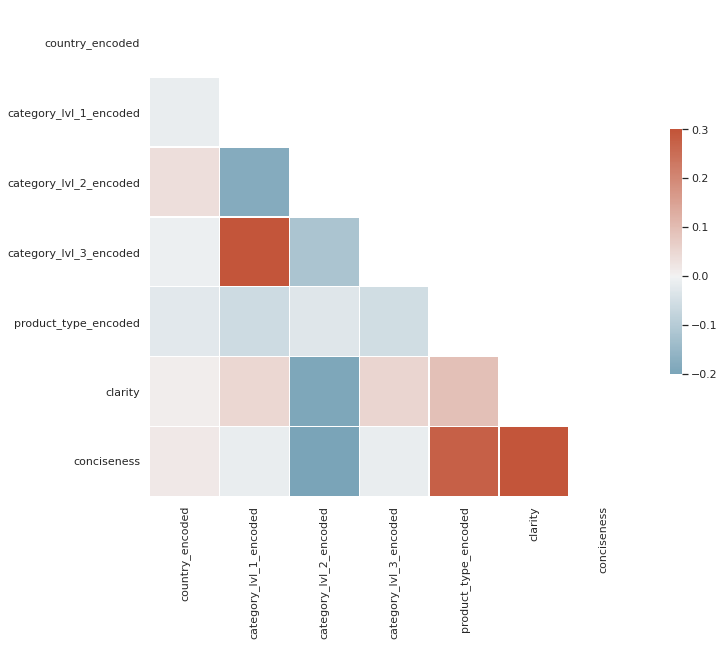

In [245]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Distributions

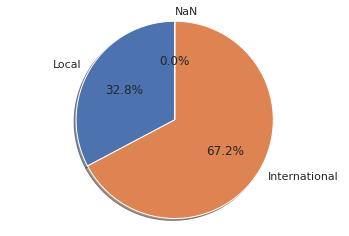

In [246]:
fig, ax = plt.subplots()

unique_array = training_data['product_type_encoded'].value_counts().array
international = unique_array[0]
NaN_region = unique_array[2]
local = unique_array[1]

ax.pie((local, international, NaN_region), labels=['Local', 'International', 'NaN'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

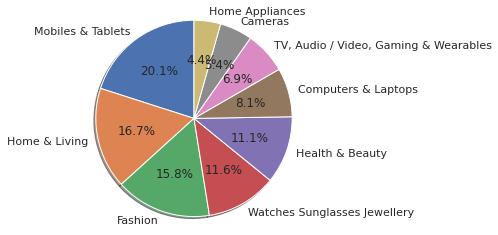

In [247]:
category_index = training_data['category_lvl_1'].value_counts().reset_index()

fig, ax = plt.subplots()

labels = []
count_for_labels = []

for i in range(0, len(category_index)):
    labels.append(category_index.iloc[i][0])
    count_for_labels.append(category_index.iloc[i][1])

ax.pie(count_for_labels, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



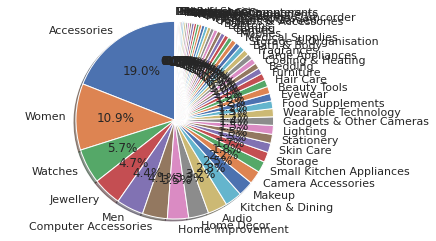

In [248]:
category_index = training_data['category_lvl_2'].value_counts().reset_index()

fig, ax = plt.subplots()

labels = []
count_for_labels = []

for i in range(0, len(category_index)):
    labels.append(category_index.iloc[i][0])
    count_for_labels.append(category_index.iloc[i][1])

ax.pie(count_for_labels, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



## Outliers

<AxesSubplot:>

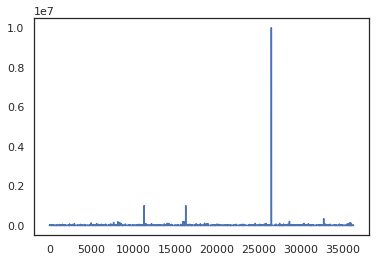

In [249]:
training_data['price'].plot()

<AxesSubplot:>

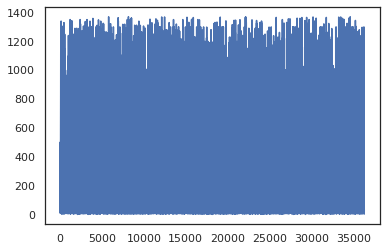

In [250]:
training_data[training_data['price'].mean() + 200 >= training_data['price']]['price'].plot()

## Similarity

## Brand Names And SKU ID

## Clarity Vs Conciseness 

# Feature Engineering 

Before extracting features, we preprocess the data by removingHTML tags, removing special characters, and replacing missingvalues

![Table 3 - All features set](assets/img/3.png)
![Table 2 - All features set](assets/img/4.png)

# Modelling 